In [1]:
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<6):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    raise ValueError("path_pipest not found. Instead: {}".format(path_pipest))
path_sdhawkes=path_pipest+'/sdhawkes_powerlaw'
path_lobster=path_pipest+'/lobster_for_sdhawkes'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_models=path_pipest+'/models'
path_tests=path_pipest+'/tests'
path_saved_tests=path_tests+'/saved_tests'

In [2]:
import time
import sys
sys.path.append(path_sdhawkes+'/resources/')
sys.path.append(path_sdhawkes+'/modelling/')
sys.path.append(path_lobster_pyscripts+'/')

In [3]:
import pickle
import numpy as np
import pandas as pd

In [4]:
import model as sd_hawkes_model
import lob_model
import computation
import simulation
import goodness_of_fit
import mle_estimation as mle_estim

In [5]:
name_of_test = "test_estim_model_2020-04-05_1119"

In [6]:
with open(path_tests+'/saved_tests/'+name_of_test,'rb') as source:
    model=pickle.load(source)
print(model.name_of_model)
print('Date and time of initilisation: {}'.format(model.datetime_of_initialisation))
print('number_of_event_types: {}; number_of_states: {}'.format(
    model.number_of_event_types, model.number_of_states))

test_estim_model_2020-04-05_1119
Date and time of initilisation: 2020-04-05 11:19:14.055178
number_of_event_types: 4; number_of_states: 15


The following three figures will show QQ plots that assess goodness of fit. The first figure refers to the coefficients inserted by the user; it asseses the reliability of the simulation and it is expected to show good results. The second picture refers to the coefficients obtained via non-parametric estimation. The results can be mixed since the procedure assumes stationarity of the point process and i.i.d. sequences of marks (which may not hold). The third figure refers to the parameters obtained via maximum likelihood estimation and it is expected to be an improvement over the non-parametric estimation; this is because on the one hand the mle estimation does not assume stationarity, and on the other hand the results of the non-parametric estimations are used as one of the initilisations for the gradient descent of the mle estimation.

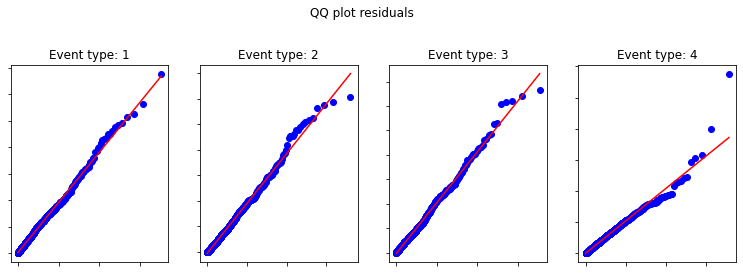

In [7]:
model.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)

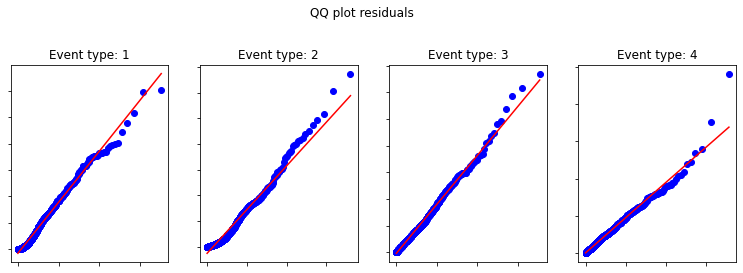

In [8]:
model.nonparam_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)

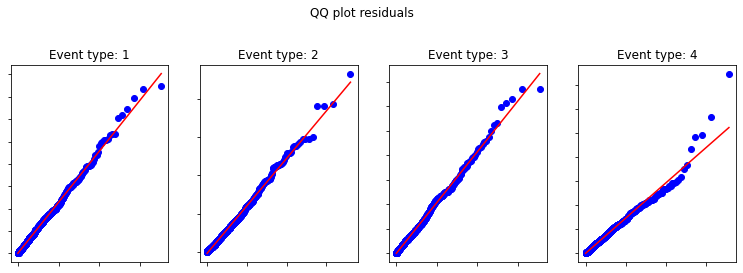

In [9]:
model.mle_estim.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1)

In [10]:
minim=model.mle_estim.results_of_estimation[1].get("MinimisationProcedure")

In [11]:
minim.results

[{'x_min': array([6.55241143e-01, 1.04210858e+00, 1.00525968e-01, 2.51380305e-02,
         3.13454908e-02, 1.10448944e-02, 3.22070317e-02, 3.79671381e-02,
         1.53737551e-01, 1.21189752e-02, 1.51714620e-02, 2.24194138e-03,
         2.49997863e+01, 4.25384860e-02, 1.32231859e-02, 1.05136633e+01,
         3.93440778e-02, 1.03248094e+00, 2.49988306e+01, 4.23566680e-02,
         4.13662754e-02, 7.87406915e-02, 8.37078559e-02, 1.65234609e-02,
         8.50632979e-01, 7.04495570e-01, 2.52811515e-02, 1.56329805e-02,
         8.06706365e-02, 2.83870222e-02, 2.49997312e+01, 5.16885236e-02,
         2.89782496e-02, 4.95391231e+00, 3.13143613e-02, 3.90689657e-03,
         2.02994268e-02, 5.87938143e-02, 2.55918282e-02, 1.54820343e+00,
         4.70793346e+00, 9.17018056e-03, 2.51318651e-02, 4.09384545e+00,
         2.50915062e-01, 7.70372215e-04, 2.49985250e+01, 3.30252712e-02,
         1.01733848e+01, 1.25380511e-03, 4.16510162e-02, 2.02279818e-02,
         4.08806187e-02, 9.34886429e-02, 2

In [18]:
np.allclose(model.impact_coefficients, model.mle_estim.hawkes_kernel.alphas)

False

In [13]:
model.nonparam_estim.base_rates

array([1.e-07, 1.e-07, 1.e-07, 1.e-07])

In [14]:
model.base_rates

array([1.6, 1.8, 1.8, 1.6])

In [15]:
model.mle_estim.base_rates

array([0.93313119, 0.65524114, 0.5229539 , 0.72885929])

In [16]:
np.allclose(model.nonparam_estim.transition_probabilities, model.mle_estim.transition_probabilities)

False

In [17]:
x1=2
e=0
print(model.transition_probabilities[x1,e,:])
print(model.mle_estim.transition_probabilities[x1,e,:])
print(model.nonparam_estim.transition_probabilities[x1,e,:])

[0.14835945 0.0848912  0.05907698 0.04479109 0.0327122  0.10778603
 0.08398307 0.08436628 0.06105956 0.04579776 0.05105153 0.02755589
 0.08732733 0.0469182  0.03432343]
[0.25862069 0.06896552 0.06896552 0.0862069  0.         0.12068966
 0.12068966 0.06896552 0.10344828 0.01724138 0.06896552 0.03448276
 0.12068966 0.01724138 0.03448276]
[0.28571429 0.08163265 0.08163265 0.08163265 0.         0.14285714
 0.14285714 0.08163265 0.14285714 0.02040816 0.08163265 0.04081633
 0.14285714 0.02040816 0.04081633]
